In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import unet
from unet import utils
from unet.datasets import circles

In [25]:
# train_dataset, validation_dataset = circles.load_data(100, nx=200, ny=200, splits=(0.7, 0.3))
# train_dataset

<TensorSliceDataset shapes: ((200, 200, 1), (200, 200, 2)), types: (tf.float64, tf.float64)>

In [33]:
images = np.zeros((100,200,200,1))
labels = np.zeros((100,200,200,2))
test_dataset = tf.data.Dataset.from_tensor_slices((images,labels))


<TensorSliceDataset shapes: ((200, 200, 1), (200, 200, 2)), types: (tf.float64, tf.float64)>

In [53]:
a = 1

In [2]:
# unet_model = unet.build_model(channels=circles.channels,
#                               num_classes=circles.classes,
#                               layer_depth=3,
#                               filters_root=16)
# unet.finalize_model(unet_model)

<TensorSliceDataset shapes: ((200, 200, 1), (200, 200, 2)), types: (tf.float64, tf.float64)>

In [4]:
trainer = unet.Trainer(checkpoint_callback=False)
trainer.fit(unet_model,
            train_dataset,
            validation_dataset,
            epochs=5,
            batch_size=1)

Epoch 1/5
70/70 [==============================] - 18s 245ms/step - loss: 0.5437 - categorical_crossentropy: 0.5437 - categorical_accuracy: 0.7781 - mean_iou: 0.3332 - dice_coefficient: 0.6336 - auc: 0.7970 - val_loss: 0.1353 - val_categorical_crossentropy: 0.1353 - val_categorical_accuracy: 0.9534 - val_mean_iou: 0.5056 - val_dice_coefficient: 0.9080 - val_auc: 0.9913
Epoch 2/5
70/70 [==============================] - 17s 239ms/step - loss: 0.1639 - categorical_crossentropy: 0.1639 - categorical_accuracy: 0.9515 - mean_iou: 0.5269 - dice_coefficient: 0.9149 - auc: 0.9845 - val_loss: 0.0925 - val_categorical_crossentropy: 0.0925 - val_categorical_accuracy: 0.9534 - val_mean_iou: 0.6297 - val_dice_coefficient: 0.9548 - val_auc: 0.9922
Epoch 3/5
70/70 [==============================] - 17s 242ms/step - loss: 0.1370 - categorical_crossentropy: 0.1370 - categorical_accuracy: 0.9518 - mean_iou: 0.5685 - dice_coefficient: 0.9288 - auc: 0.9878 - val_loss: 0.0908 - val_categorical_crossentropy

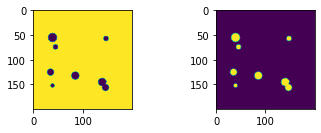

In [51]:
#prediction = unet_model.predict(validation_dataset.batch(batch_size=3))
for i, (image, label) in enumerate(validation_dataset.take(3)):
    dir(label)
mask = label.numpy()
plt.subplot(2,2,1)
plt.imshow(mask[:,:,0])
plt.subplot(2,2,2)
plt.imshow(mask[:,:,1])

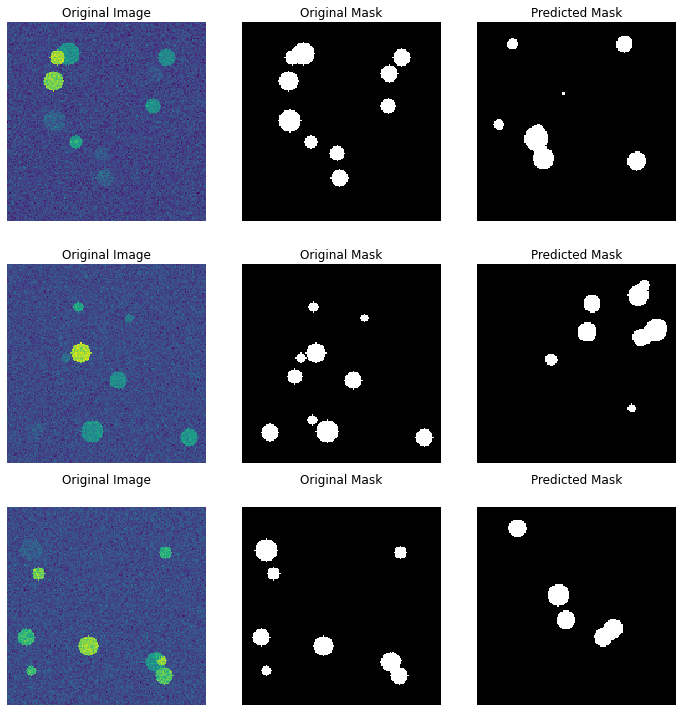

In [52]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
dataset = validation_dataset.map(utils.crop_image_and_label_to_shape(prediction.shape[1:]))

for i, (image, label) in enumerate(dataset.take(3)):
    image    
    ax[i][0].matshow(image[..., -1]); ax[i][0].set_title('Original Image'); ax[i][0].axis('off')
    ax[i][1].matshow(np.argmax(label, axis=-1), cmap=plt.cm.gray); ax[i][1].set_title('Original Mask'); ax[i][1].axis('off')
    ax[i][2].matshow(np.argmax(prediction[i,...], axis=-1), cmap=plt.cm.gray); ax[i][2].set_title('Predicted Mask'); ax[i][2].axis('off')
plt.tight_layout()

<tf.Tensor: shape=(160, 160, 1), dtype=float64, numpy=
array([[[0.05599703],
        [0.31698838],
        [0.16674681],
        ...,
        [0.21492935],
        [0.22353023],
        [0.28020775]],

       [[0.22310056],
        [0.14628809],
        [0.31802902],
        ...,
        [0.20639859],
        [0.22128977],
        [0.1569279 ]],

       [[0.30491408],
        [0.18020116],
        [0.2221657 ],
        ...,
        [0.27469056],
        [0.13739451],
        [0.1866071 ]],

       ...,

       [[0.16236331],
        [0.22030679],
        [0.25001884],
        ...,
        [0.23643712],
        [0.14134192],
        [0.2257656 ]],

       [[0.33787555],
        [0.23098358],
        [0.15016349],
        ...,
        [0.19911713],
        [0.27439507],
        [0.153868  ]],

       [[0.21689138],
        [0.22210628],
        [0.19439946],
        ...,
        [0.22669236],
        [0.21689435],
        [0.21710691]]])>